# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
print ("Ok!")

Ok!


In [28]:
%matplotlib inline

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [29]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [30]:
df_taxi.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [31]:
df_taxi.dtypes

pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [32]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

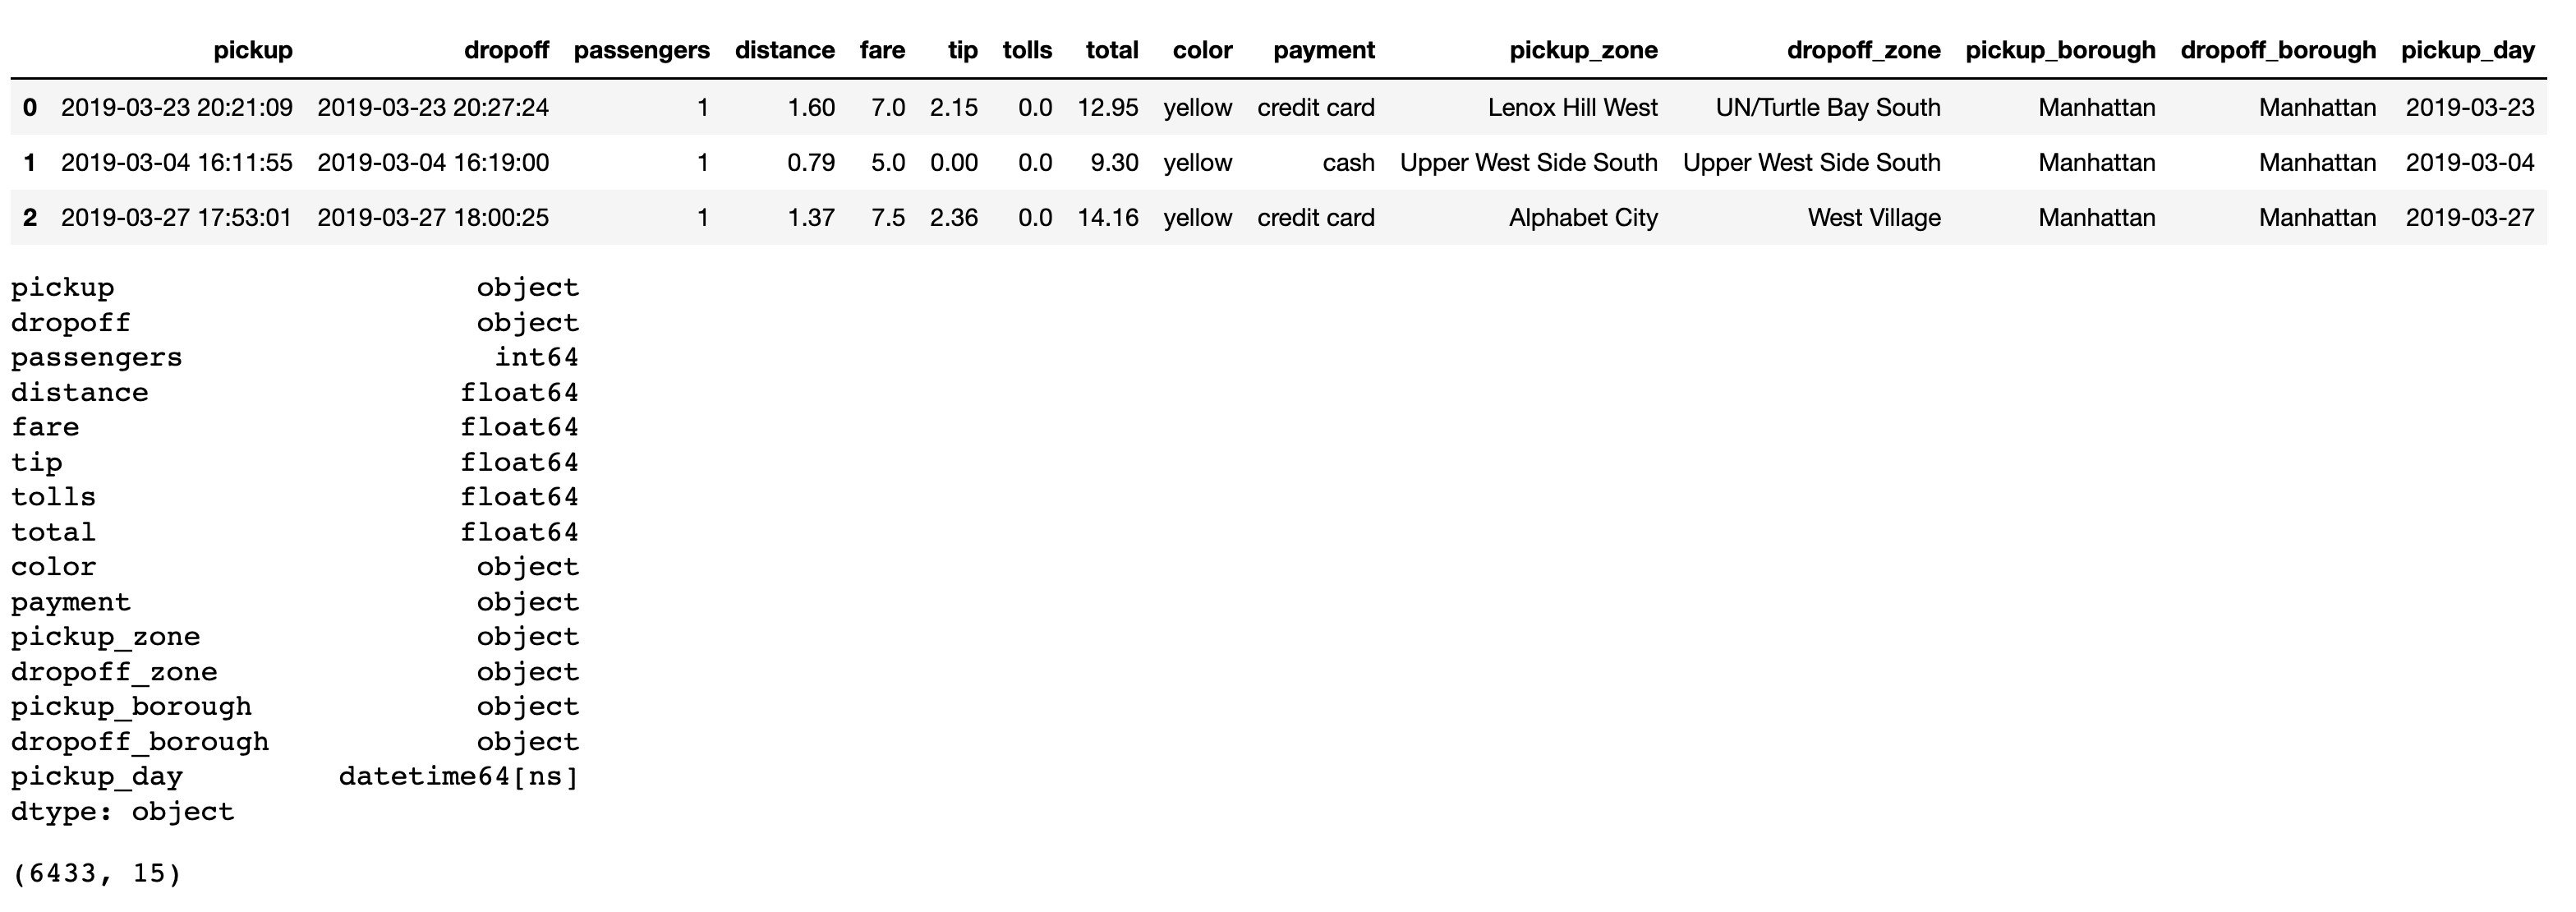

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [33]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [34]:
df_taxi[df_taxi['payment'].isna()][:10]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.0,11.8,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.0,6.3,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.0,5.8,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.0,15.8,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.0,11.8,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.4,2.5,0.0,0.0,3.8,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens
913,2019-03-23 11:26:58,2019-03-23 11:35:17,2,1.3,7.5,0.0,0.0,10.8,yellow,NaN,Upper East Side South,Lincoln Square West,Manhattan,Manhattan
953,2019-03-08 02:58:37,2019-03-08 03:19:27,2,6.9,23.5,0.0,0.0,27.3,yellow,NaN,Garment District,Central Harlem North,Manhattan,Manhattan
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.0,0.0,5.8,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1372,2019-03-12 09:19:44,2019-03-12 09:43:09,1,1.6,14.5,0.0,0.0,17.8,yellow,NaN,Midtown East,Garment District,Manhattan,Manhattan


Відповідь: 
    На мій погляд, відсутні дані в колонці методу оплати, можуть бути з кількох причин:
а) поїздка була анульована, або відмінена водієм, дану гіпотезу можна підтвердити, дуже короткою тривалістю поїздок (різниця між dropoff та pickup) та той факт, що розраховується лише базова варіть поїздки, яка ймовірно автоматично залежить від початкової заданої відстані, а чайові за поїздку та вартість за використання платних доріг = 0.
b) метод розрахунку був змінений, після завершення або під час поїздки. На сайті даної транспортної компанії, вказано, що метод оплати можна замінити, використавши певний код, можливо, в такому випадку, дані не зберігаються. 
c) якщо дана транспортна компанія, працює з корпоративними клієнтами, можливо, це той випадок, коли послуга оплачується за договором, тобто пасажир  безпосередньо не здійснює платежі.
d) періодично, щось просто не спрацьовує.

In [35]:
df_taxi[((df_taxi['distance'] == 0) & (df_taxi['total' ] !=0))][:10]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.0,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.0,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.0,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.0,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.0,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.0,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


Відповідь: 
    На мій погляд, значення distance==0, а total!=0, можуть бути з кількох причин:
a) поїздка була анульована, або відмінена водієм чи пасажиром, дану гіпотезу можна підтвердити, дуже короткою тривалістю поїздки (різниця між dropoff та pickup); 
b) в більшості випадків можна помітити, що разом зі значенням distance==0 відсутнє одне або кілька значень в колонках pickup_zone або dropoff_zone, тобто система моніторингу місяця розташування, з якоїсь причини не встигла спрацювати або тимчасово не була доступна в певному регіоні, або тимчасово не працювала на певній кількості машин. 
c) класично, періодично, щось просто не спрацьовує.
Додатково я спробувала знайти інформацію про цей  аналіз та порівняти висновки, подібну думку має автор з наступного ресурсу:
https://www.analyticsvidhya.com/blog/2021/01/exploratory-data-analysis-on-nyc-taxi-trip-duration-dataset

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [36]:
df_taxi_clean = df_taxi.fillna('NA')
df_taxi_clean.head(7)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan


Після виконання завдання запустіть наступну клітинку:

In [37]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

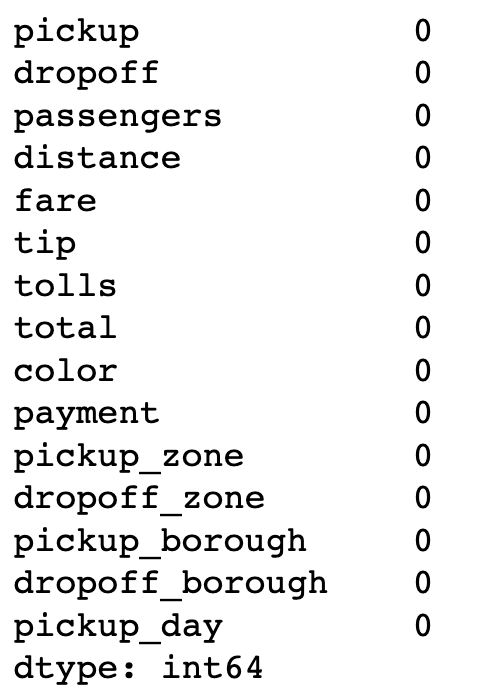

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [38]:
df_taxi_clean['pickup'] = df_taxi_clean['pickup'].astype("datetime64[ns]")

Після виконання завдання запустіть наступну клітинку:

In [39]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

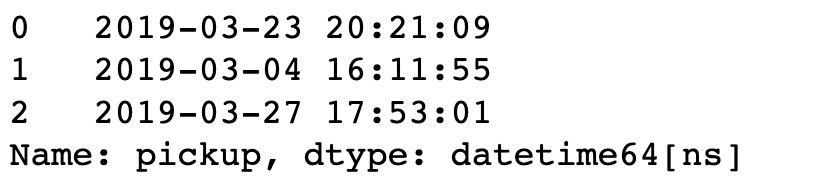

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [40]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

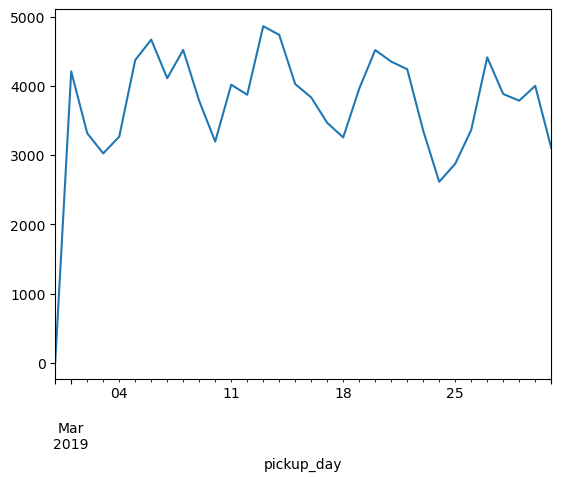

In [41]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

Очікується графік:

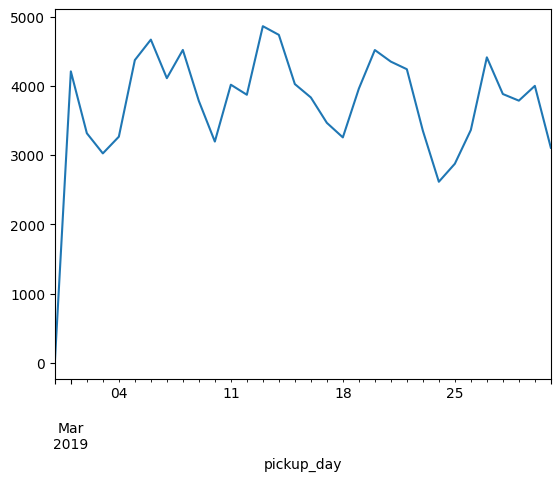

6.Виведіть кількість рядків для кожного pickup_day.

In [42]:
df_taxi_clean.groupby('pickup_day')['total'].count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [43]:
df_taxi_clean = df_taxi_clean.drop(np.where(df_taxi_clean['pickup_day'] == '2019-02-28')[0])

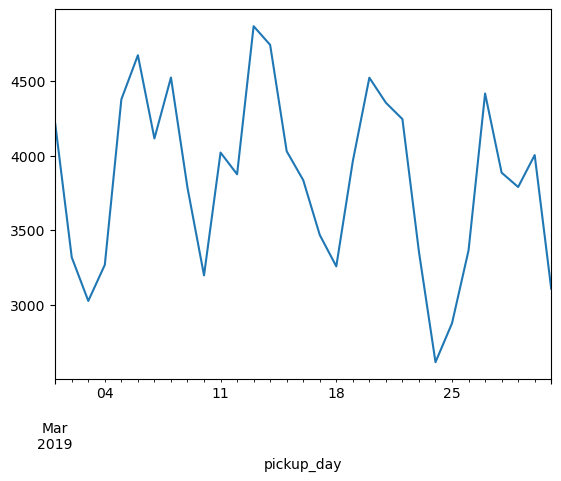

In [44]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

Очікуваний графік:

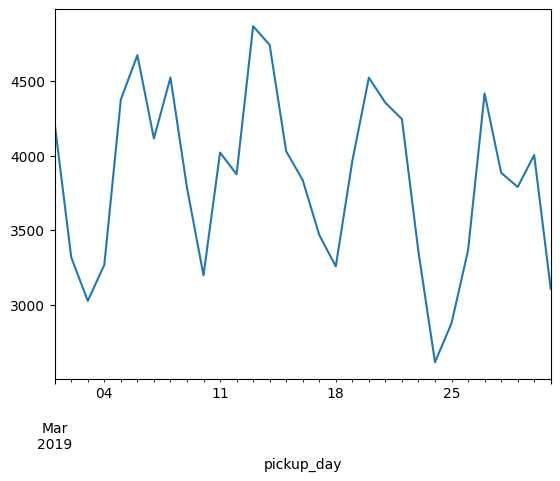

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [45]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,NA,Queens
pickup_day,,,,,
2019-03-01,123.42,353.05,3169.47,14.60,553.29
2019-03-02,NaN,146.56,2716.33,NaN,456.13
2019-03-03,80.75,407.06,2100.23,10.55,428.73
2019-03-04,92.00,188.73,2026.17,NaN,962.18
2019-03-05,98.16,558.40,2981.26,NaN,739.56
2019-03-06,130.65,198.53,3501.07,10.00,833.36
2019-03-07,NaN,440.75,3087.82,NaN,587.13
2019-03-08,79.20,237.47,3408.85,18.35,780.34
2019-03-09,80.22,187.88,2967.71,38.26,511.73


In [47]:
borough_pivot= borough_pivot.drop (borough_pivot.columns[[3]], axis = 1)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan
pickup_day,,,
2019-03-01,123.42,353.05,3169.47
2019-03-02,NaN,146.56,2716.33
2019-03-03,80.75,407.06,2100.23
2019-03-04,92.00,188.73,2026.17
2019-03-05,98.16,558.40,2981.26
2019-03-06,130.65,198.53,3501.07
2019-03-07,NaN,440.75,3087.82
2019-03-08,79.20,237.47,3408.85
2019-03-09,80.22,187.88,2967.71


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

Відповідь: Функцію fillna(0) використовуємо для заміни NaN на 0

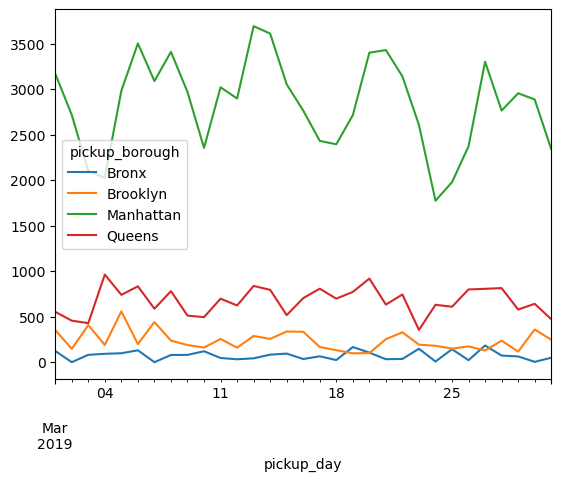

In [21]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

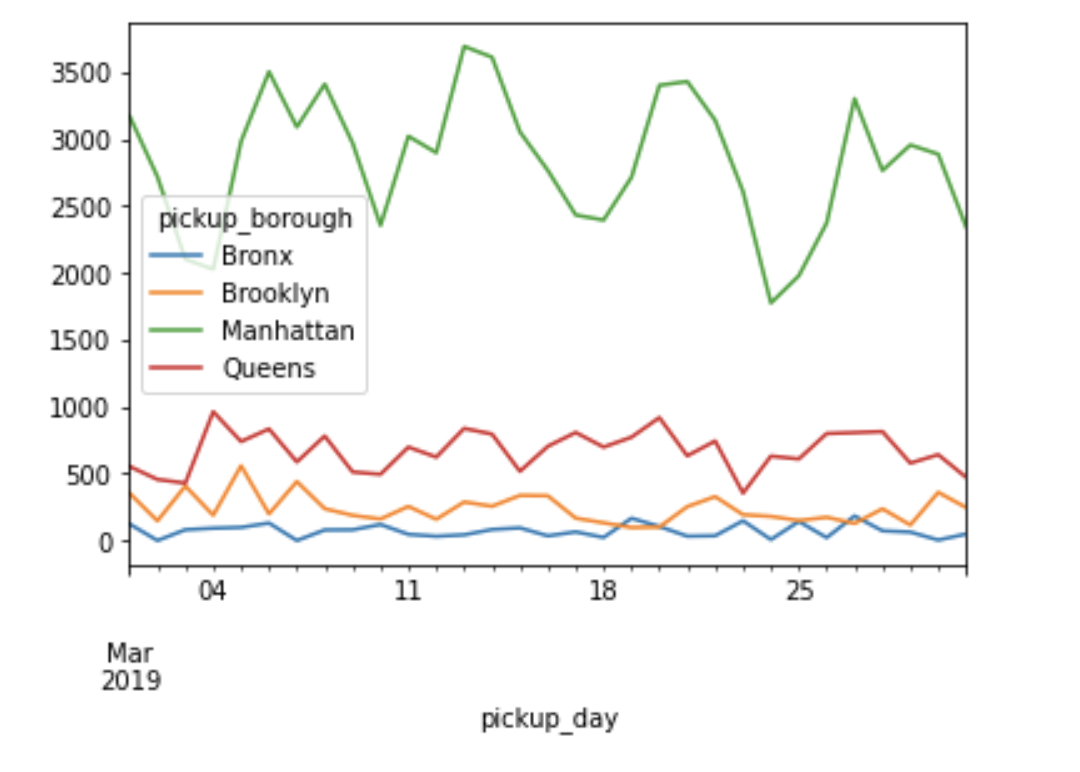

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

In [48]:
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan
pickup_day,,,
2019-03-01,123.42,353.05,3169.47
2019-03-02,NaN,146.56,2716.33
2019-03-03,80.75,407.06,2100.23
2019-03-04,92.00,188.73,2026.17
2019-03-05,98.16,558.40,2981.26
2019-03-06,130.65,198.53,3501.07
2019-03-07,NaN,440.75,3087.82
2019-03-08,79.20,237.47,3408.85
2019-03-09,80.22,187.88,2967.71


In [51]:
borough_pivot.shape

(31, 3)

Відповідь:
Для розрахунку бінів, можна використати Правило Стерджеса, де оптимальна кількіст розраховується [log 2N + 1], 
у нашому випадку [log 2 (31) + 1] = [4,954 + 1] = [5,954] = 6 .

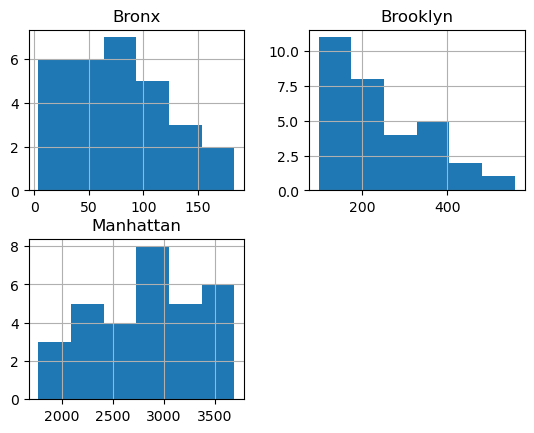

In [50]:
borough_pivot.hist(bins=6);
plt.grid(axis='both', alpha=.3);

Приклад одного з правильних виконань завдання:

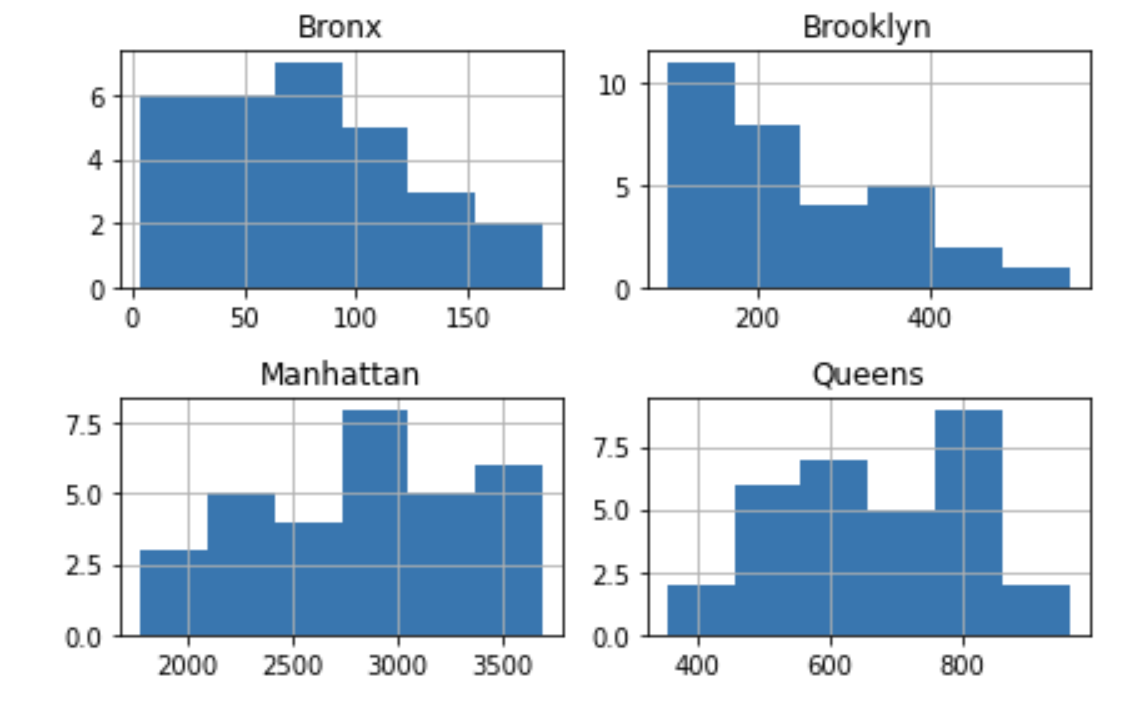

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

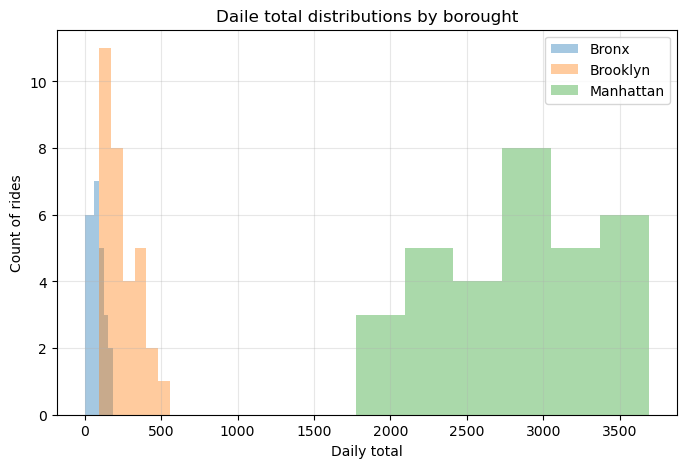

In [52]:
plt.figure(figsize=(8,5))
for col in borough_pivot.columns:
    plt.hist(borough_pivot[col], bins=6, alpha=.4, label=col)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.title('Daile total distributions by borought')
plt.legend()
plt.grid(axis='both', alpha=.3);
plt.show();

Очікуваний результат:

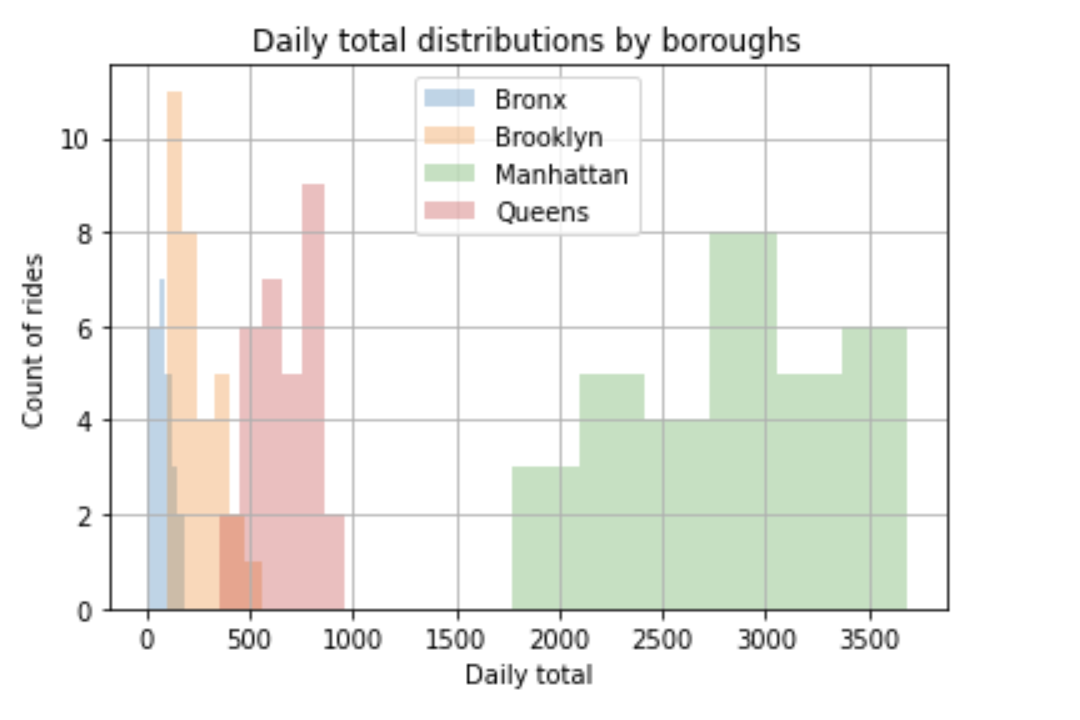

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

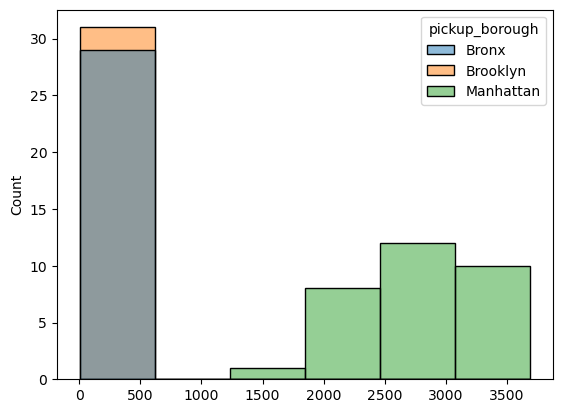

In [58]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

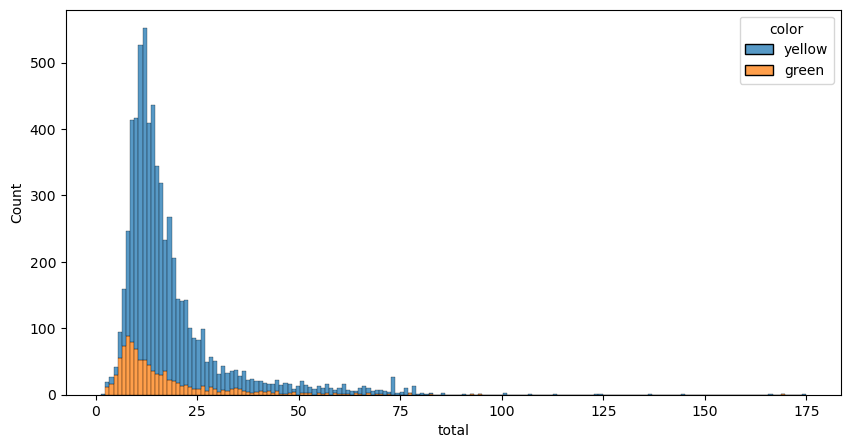

In [59]:
hist_color= sns.histplot(data=df_taxi_clean, x="total", hue = "color", multiple="stack");
hist_color.figure.set_size_inches(10,5)

Очікуваний результат:

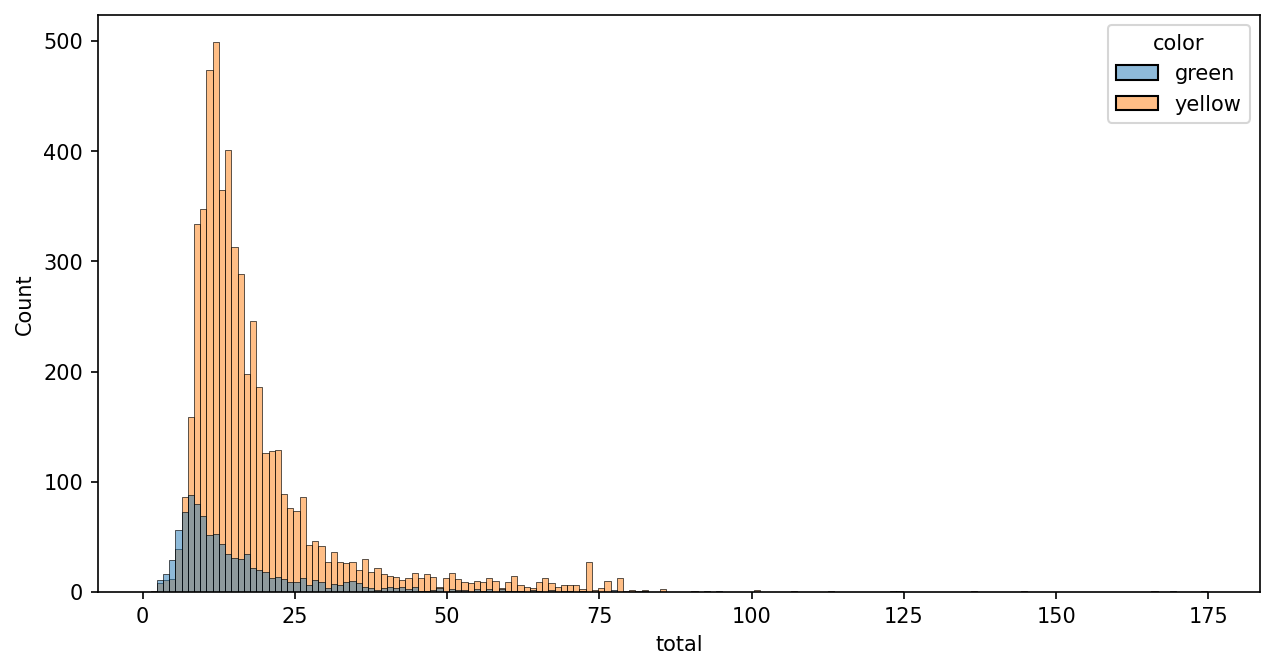

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `scatter_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

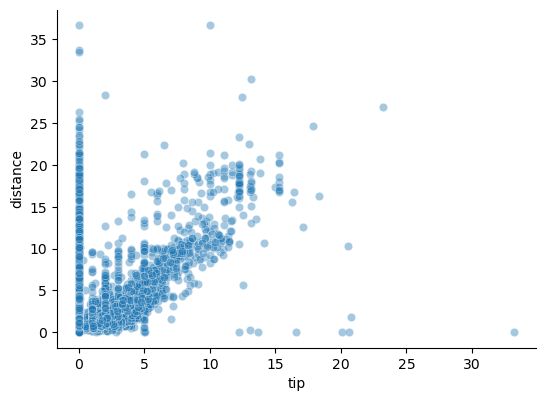

In [61]:
# тестувала реалізацію діаграми розсіювання, через pairplot
correl_tip_dist= sns.pairplot(df_taxi_clean, x_vars=["tip"], y_vars=["distance"], plot_kws={'alpha': 0.4});
correl_tip_dist.figure.set_size_inches(6.5, 4.5)

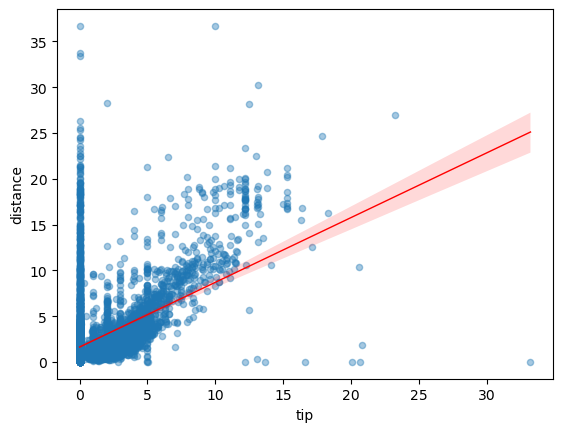

In [62]:
sns.regplot(data=df_taxi_clean, x="tip", y="distance", 
            scatter_kws = {'s': 20, 'alpha': 0.4}, line_kws = {'lw':1, 'color':'red'});

Один з можливих результатів (побудовано з seaborn):

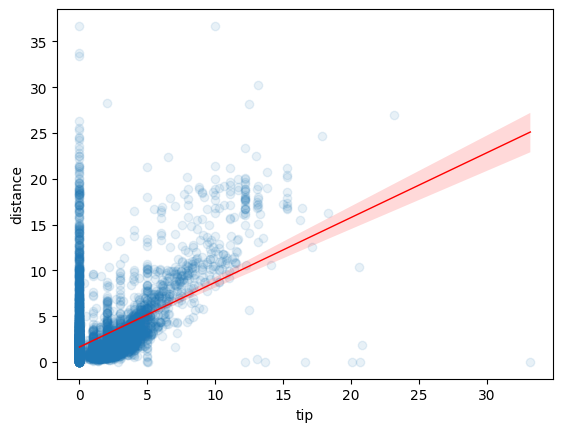

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Відповідь: Думаю, це означає, що незалежно від  відстані є певна кількість поїздок, де пасажири зовсім не залишають чайові або дані про чайові не були зафіксовані/збережені в системі.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [63]:
borough_pivot_tip = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='tip', aggfunc='sum')
borough_pivot_tip= borough_pivot_tip.drop (borough_pivot_tip.columns[[3]], axis = 1)
borough_pivot_tip

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,1.36,15.68,394.33,28.60
2019-03-02,NaN,6.81,297.37,29.79
2019-03-03,1.00,29.46,244.51,30.75
2019-03-04,0.00,3.97,217.12,113.89
2019-03-05,0.00,15.64,340.90,74.64
2019-03-06,0.00,9.12,437.78,82.46
2019-03-07,NaN,20.29,351.96,64.99
2019-03-08,2.00,5.15,387.48,83.90
2019-03-09,0.00,11.91,315.57,39.15


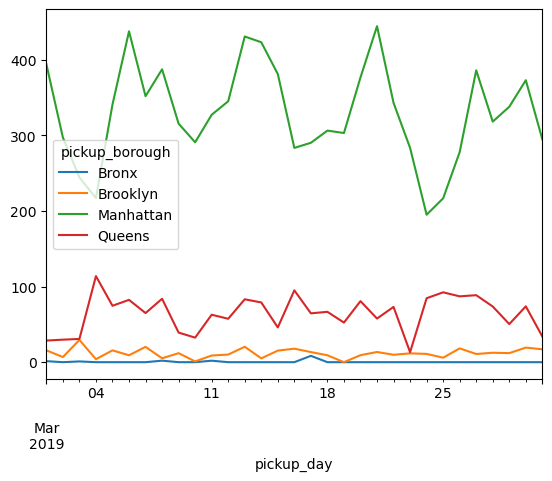

In [64]:
borough_pivot_tip_plot = borough_pivot_tip.fillna(0).plot();

In [84]:
borough_pivot_tip

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,1.36,15.68,394.33,28.60
2019-03-02,NaN,6.81,297.37,29.79
2019-03-03,1.00,29.46,244.51,30.75
2019-03-04,0.00,3.97,217.12,113.89
2019-03-05,0.00,15.64,340.90,74.64
2019-03-06,0.00,9.12,437.78,82.46
2019-03-07,NaN,20.29,351.96,64.99
2019-03-08,2.00,5.15,387.48,83.90
2019-03-09,0.00,11.91,315.57,39.15


Відповідь:
    Думаю, при формуванні графіків чи даних для їх формування, я допустила помилку, оскільки мої результати відрізняються від очікуваних.
Однак, опираючись на отримані дані, відповіді наступні:
В якому районі найрідше дають чайові? Bronx;
В поїздках з якого району найчастіше дають чайові? Згідно побудованих мною графіків, складно відповісти на це запитання, але думаю, це – Manhattan;
При проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)? Bronx;

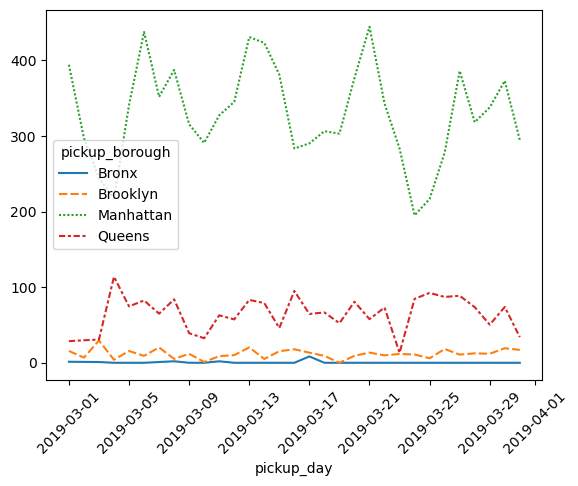

In [85]:
sns.lineplot(data = borough_pivot_tip);
plt.xticks(rotation=45);

Один з можливих результатів (побудовано з seaborn):

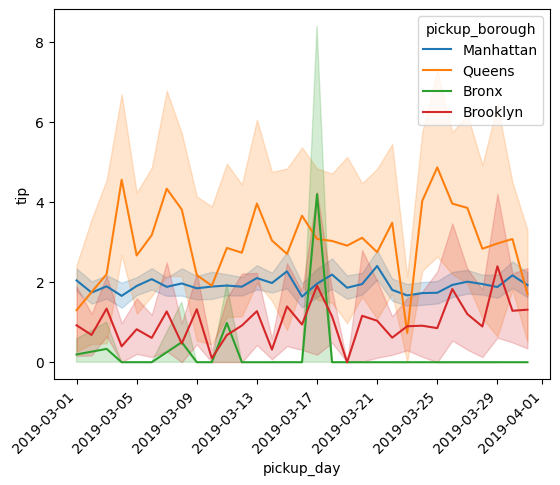

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

In [65]:
borough_pivot_tip.fillna(0)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,1.36,15.68,394.33,28.60
2019-03-02,0.00,6.81,297.37,29.79
2019-03-03,1.00,29.46,244.51,30.75
2019-03-04,0.00,3.97,217.12,113.89
2019-03-05,0.00,15.64,340.90,74.64
2019-03-06,0.00,9.12,437.78,82.46
2019-03-07,0.00,20.29,351.96,64.99
2019-03-08,2.00,5.15,387.48,83.90
2019-03-09,0.00,11.91,315.57,39.15


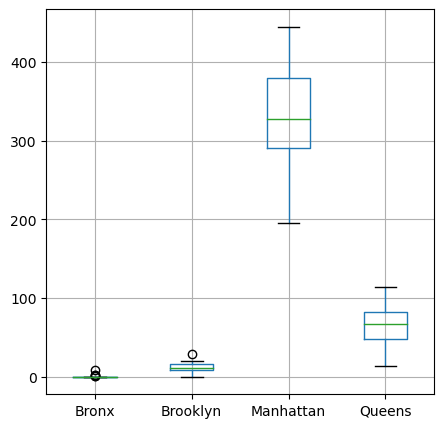

In [66]:
borough_pivot_tip.boxplot(figsize=(5,5));

Один з можливих результатів (побудовано з seaborn):

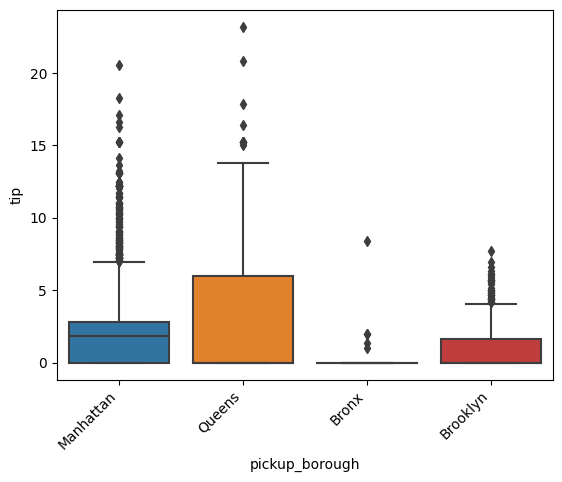

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

1. Спроба перевірити, залежність кількості поїздок по різним районам від днів тижня, коли дані поїздки відбуваються.
Який з днів тижня, найбільш завантажений для водій, та навпаки, коли кількість машин можна зменшити.

In [67]:
import datetime as dt

In [68]:
# тест для перевірки , чи працює бібліотека
x = dt.datetime.now()
print(x.year)

2023


In [69]:
df_taxi_clean['date_weekday'] = df_taxi_clean.pickup_day.dt.strftime("%A")

In [70]:
df_taxi_clean.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,date_weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,Saturday
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,Monday
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,Wednesday


In [71]:
borough_pivot_weekday = df_taxi_clean.pivot_table(index='date_weekday', columns='pickup_borough', values='total', aggfunc='count')
borough_pivot_weekday = borough_pivot_weekday.drop (borough_pivot_weekday.columns[[3]], axis = 1)
borough_pivot_weekday

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
date_weekday,,,,
Friday,22,60,928,99
Monday,13,38,567,88
Saturday,14,66,857,103
Sunday,10,64,697,93
Thursday,7,59,749,88
Tuesday,14,48,669,89
Wednesday,19,48,801,96


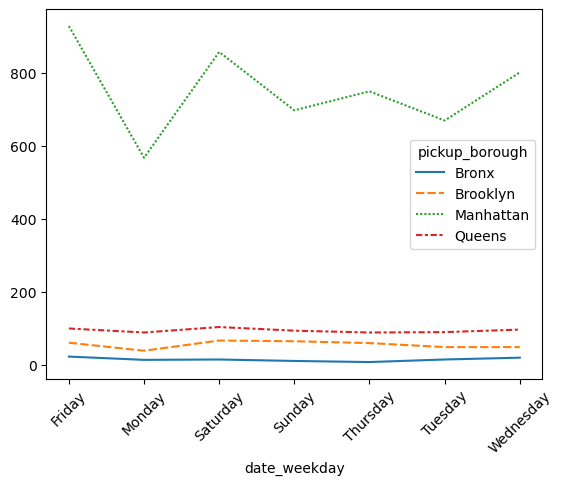

In [72]:
sns.lineplot(data=borough_pivot_weekday)
plt.xticks(rotation=45);

2. Подібна першому запиту, спроба виявити залежність довжини відстані в поїздках по різним районам від днів тижня, коли дані поїздки відбуваються.
Але вона фактично аналогічна попередньому випадку, тобто варіанти, що жителі певного району виїздять, за місто на вихідні, а в понеділок повертаються - не зафіксовано.

In [109]:
borough_pivot_wd_dist = df_taxi_clean.pivot_table(index='date_weekday', columns='pickup_borough', values='distance', aggfunc='sum')
borough_pivot_wd_dist = borough_pivot_wd_dist.drop (borough_pivot_wd_dist.columns[[3]], axis = 1)
borough_pivot_wd_dist

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
date_weekday,,,,
Friday,90.15,279.41,2153.81,723.50
Monday,81.50,153.33,1378.86,675.78
Saturday,73.73,266.24,2046.72,654.53
Sunday,68.35,251.48,1609.21,680.98
Thursday,43.43,255.51,1741.82,677.94
Tuesday,85.10,217.24,1474.81,681.36
Wednesday,124.60,131.26,1973.11,810.06


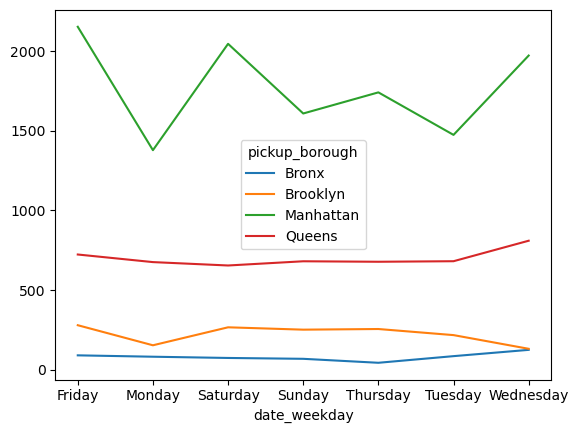

In [117]:
borough_pivot_wd_dist.plot();

3. Спроба, перевірити залежність різної кількості пасажирів та розмір чайових, які вони залишають у поїздці, в залежності від району міста. Можливо, якщо в машині більше людей, розмір чайових збільшується? 

In [129]:
borough_pivot_passengers = df_taxi_clean.pivot_table(index='passengers', columns='pickup_borough', values='tip', aggfunc='sum')
borough_pivot_passengers = borough_pivot_passengers.drop (borough_pivot_passengers.columns[[3]], axis = 1)

In [131]:
data_pas = borough_pivot_passengers.fillna(0)
data_pas

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
passengers,,,,
0,0.00,0.00,171.57,58.40
1,14.71,300.73,7186.16,1417.09
2,0.00,32.71,1509.12,275.92
3,0.00,11.07,426.00,68.03
4,0.00,5.00,184.25,61.57
5,0.00,13.09,477.05,73.23
6,0.00,7.51,263.40,43.08


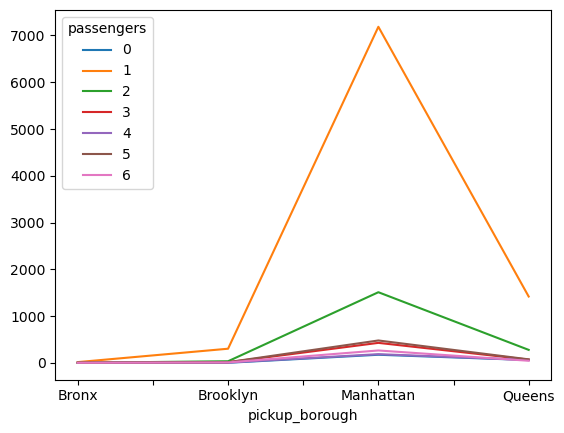

In [139]:
data_pas.T.plot();